In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/README.md.txt
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-173.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-334.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-309.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-487.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-178.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png
/kaggle/input/tuberculos

In [2]:
!pip install mplcyberpunk
!pip install split-folders

import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [3]:
base_path = r'/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/'
base_path = pathlib.Path(base_path)
base_path

PosixPath('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database')

In [4]:
splitfolders.ratio(base_path, output='X_ray_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 4200 files [00:37, 111.68 files/s]


In [5]:
NormalImgs = [fn for fn in os.listdir('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal') if fn.endswith('.png')]
TuberculosisImgs = [fn for fn in os.listdir('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis') if fn.endswith('.png')]

In [6]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [7]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_path, 
                                              target_size= (75, 75),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1./255, validation_split= 0.2)

val_data= val_datagen.flow_from_directory(base_path, 
                                              target_size= (75, 75),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 3360 images belonging to 2 classes.

validation data :
Found 840 images belonging to 2 classes.


In [8]:
# batch_size = 20
# img_height, img_width = 7575, 75
# input_shape = (img_height, img_width, 3)

# datagen= ImageDataGenerator(rescale=1/255)

# train_data = datagen.flow_from_directory('X_ray_Imgs/train', target_size=(75, 75),
#                                       batch_size=batch_size, class_mode='categorical', subset='training')

# test_data = datagen.flow_from_directory('X_ray_Imgs/test', target_size=(75, 75),
#                                       batch_size=batch_size, class_mode='categorical', shuffle=False)

# val_data = datagen.flow_from_directory('X_ray_Imgs/val/', target_size=(75, 75), batch_size=batch_size, class_mode='categorical', shuffle=False)

In [9]:
train_data.class_indices

{'Normal': 0, 'Tuberculosis': 1}

In [10]:
from keras.applications import xception

base_model = xception.Xception(weights='imagenet',include_top=False,input_shape=(75,75, 3),pooling='avg')

83683744/83683744 [==============================] - 0s 0us/step


In [11]:
top_model = Sequential()

top_model.add(Dense(256, activation='relu', input_shape=base_model.output_shape[1:]))
top_model.add(Dropout(0.5))

top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))

top_model.add(Dense(1, activation='sigmoid'))
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 10,
                   verbose=1 
                  )

Epoch 1/10
105/105 [==============================] - 62s 434ms/step - loss: 0.4651 - accuracy: 0.8042 - val_loss: 0.3340 - val_accuracy: 0.8413
Epoch 2/10
105/105 [==============================] - 41s 393ms/step - loss: 0.2937 - accuracy: 0.8333 - val_loss: 0.2840 - val_accuracy: 0.8413
Epoch 3/10
105/105 [==============================] - 44s 424ms/step - loss: 0.2409 - accuracy: 0.8333 - val_loss: 0.2668 - val_accuracy: 0.8413
Epoch 4/10
105/105 [==============================] - 44s 424ms/step - loss: 0.2190 - accuracy: 0.8333 - val_loss: 0.2852 - val_accuracy: 0.8413
Epoch 5/10
105/105 [==============================] - 44s 424ms/step - loss: 0.1963 - accuracy: 0.8613 - val_loss: 0.3131 - val_accuracy: 0.8714
Epoch 6/10
105/105 [==============================] - 41s 392ms/step - loss: 0.1799 - accuracy: 0.9396 - val_loss: 0.2323 - val_accuracy: 0.8870
Epoch 7/10
105/105 [==============================] - 45s 424ms/step - loss: 0.1662 - accuracy: 0.9560 - val_loss: 0.2101 - val_ac

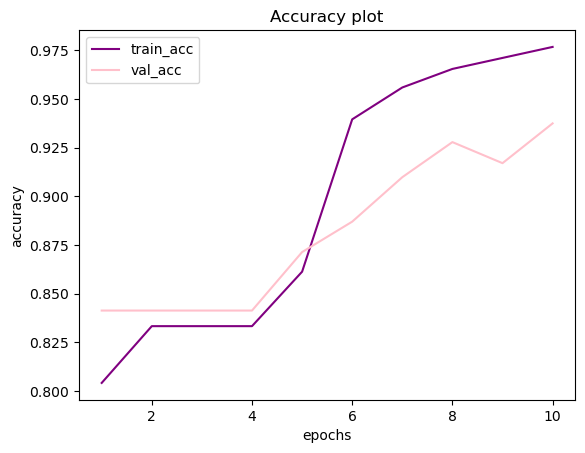

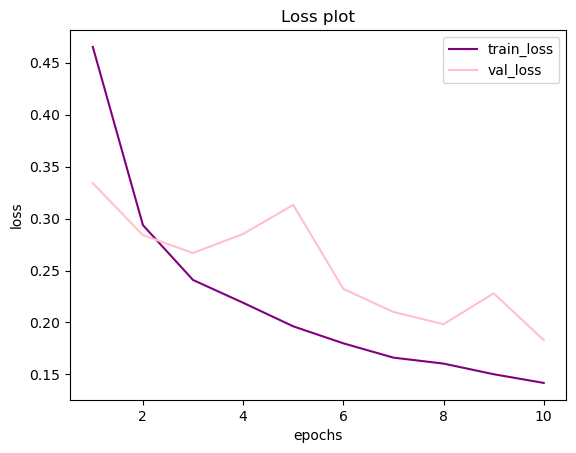

In [13]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [42]:
import numpy as np
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=2)
prediction= (prediction > 0.5)
prediction

27/27 - 7s - 7s/epoch - 269ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [51]:
prediction.shape

(840, 1)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (840, 1)

In [15]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

0.9369047619047619
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       700
           1       0.96      0.65      0.77       140

    accuracy                           0.94       840
   macro avg       0.95      0.82      0.87       840
weighted avg       0.94      0.94      0.93       840



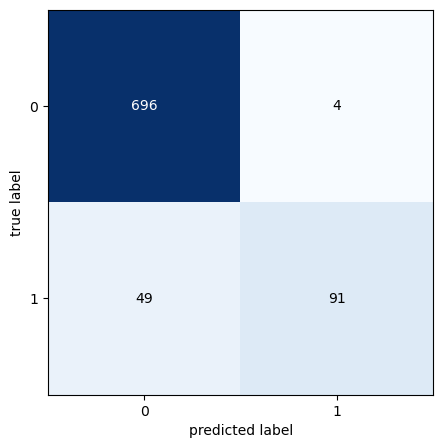

In [43]:
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

In [44]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(val_data.classes, prediction)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,696,4
Actual Positive,49,91


In [45]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics(cm)

True Positives: 91
True Negatives: 696
False Positives: 4
False Negatives: 49
--------------------------------------------------
Accuracy: 0.94
Mis-Classification: 0.06
Sensitivity: 0.65
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.79


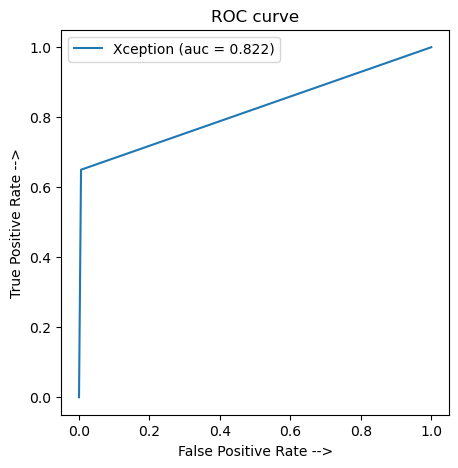

In [48]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(val_data.classes, prediction)
auc_Xception = auc(fpr, tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Xception (auc = %0.3f)' % auc_Xception)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.title("ROC curve")
plt.show()

In [17]:
li=list(train_data.class_indices)

Following is our prediction:
1/1 [==============================] - 0s 24ms/step
[[0.5911371]]
TB
[0.4088629 0.5911371]


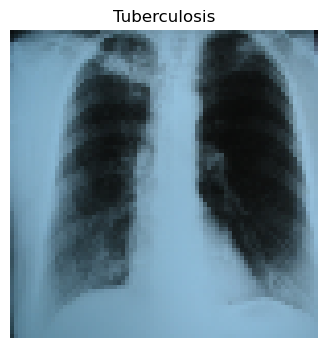

In [55]:
# predicting an image
from keras.preprocessing import image
import numpy as np
from keras.applications import imagenet_utils
image_path = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-2.png"
new_img = tf.keras.utils.load_img(image_path, target_size=(75, 75))
img = tf.keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255




print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
# print((prediction.shape))
# print(prediction)
    
print(prediction)
m=prediction.flatten()

if m<0.5:
    d=1-prediction[0]
    print("Normal")
    prediction=np.insert(prediction,1,d)
#     prediction.insert(1,d)
    
else:
    d=1-prediction[0]
#     prediction.insert(0,d)
    print("TB")
    prediction=np.insert(prediction,0,d,axis=None)






d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
#         print(j)
#         print(index,item)
        class_name = li[index]
    

    
# print(prediction.flatten().shape)
print(prediction)
#Another way
# img_class = model.predict_classes(img)
# img_prob = model.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()


# from tensorflow.keras.applications.xception import decode_predictions
# predictionLabel = decode_predictions(prediction, top = 5)
# predictionLabel

In [19]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 57.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=364c483580750a6caf3264cfb848f53b82dcb9e10d777d116f0242289f38a4e4
  Stored in directory: /root/.cache/pip/wheels/c0/96/80/1aeaaf27265398a7393b296714b84e51a7d00101f8a665a25a
Successfully built ffmpy
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.12.1
    Uninstalling huggingface-hub-0.12.1:
      Successfully uninstalled huggingface-hub-0.12.1


In [20]:
import gradio as gr

In [21]:
type(prediction)

numpy.ndarray

In [22]:
import numpy as np
class_names=['Normal','Tuberculosis']
def predict_image(img1):
  img1=img1.reshape(75,75,-1)
  img1 = tf.keras.utils.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255
  prediction=model.predict(img1)
  print(prediction)
  m=prediction.flatten()

  if m<0.5:
    d=1-prediction[0]
    print("Normal")
    prediction=np.insert(prediction,0,d)
#     prediction.insert(1,d)
    
  else:
    prediction[0]=1-prediction[0]+0.5
    d=1-prediction[0]
#     prediction.insert(0,d)
    print("TB")
    prediction=np.insert(prediction,0,d)

  print(prediction)
  for i in range(2):
    print(class_names[i],float(prediction[i]))
    
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [23]:
image = gr.inputs.Image(shape=(75,75))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://11f940051b050d8e30.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 26ms/step
[[0.00022648]]
Normal
[9.9977350e-01 2.2647735e-04]
Normal 0.9997735023498535
Tuberculosis 0.0002264773502247408
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://11f940051b050d8e30.gradio.live


In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 70.2 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.9 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=1d09dc49159bfd9fa67e16386f9dd16a5a3304060f1bb0e6d4f35b04fa833f43
  Stored in directory: /root/.cache/pip/wheels/3d/7c/f1/f87f51d07a2513aa0fb128d5eb504da1fcef9c87475d9eef64
Successfully built validators


In [33]:
model.save("my_model2.hdf5")

In [35]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

class_names = ['Normal','Tuberculosis']
#@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/kaggle/working/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         #TB Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    st.write(score)
    st.write("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

Overwriting app.py


In [26]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 19.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=4fe8e449f166ca8d350ec65686138bbaab9b3cbe569d67818f0d700991e6c530
  Stored in directory: /root/.cache/pip/wheels/b8/5b/f0/7e06eee2630e196f6ad1d84319e4ef1b4512212beb9562ac24
Successfully built pyngrok


In [27]:
!ngrok authtoken 2NNla2tmLSHHWxOhqwemJA2LeJk_5jpoP8PFkdDp9NDa2ncuH

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml                                      


In [28]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-04-08 08:02:30--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  3.37MB/s    in 4.9s    

2023-04-08 08:02:36 (2.68 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [29]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [66]:
get_ipython().system_raw('./ngrok http 8501 &')

Your account is limited to 1 simultaneous ngrok agent session.
Active ngrok agent sessions in region 'us':
  - ts_2O8TF5htQqXinQVIcpflOPGlE7y (34.168.68.118)

ERR_NGROK_108



In [67]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://9f51-34-168-68-118.ngrok-free.app


In [68]:
!streamlit run /kaggle/working/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.19.2.2:8501
  External URL: http://34.168.68.118:8501

2023-04-08 08:48:14.918743: F tensorflow/tsl/platform/statusor.cc:33] Attempting to fetch value instead of handling error INTERNAL: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 17071734784


In [ ]:
!streamlit run /kaggle/working/app.py & npx localtunnel --port 8501



Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Network URL: http://172.19.2.2:8501
  External URL: http://34.168.68.118:8501

2023-04-08 08:50:31.754879: F tensorflow/tsl/platform/statusor.cc:33] Attempting to fetch value instead of handling error INTERNAL: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 17071734784
